 # Fraud Detection Using Machine Learning

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\oasis infobyte\creditcard.csv\creditcard.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

# Data visualization

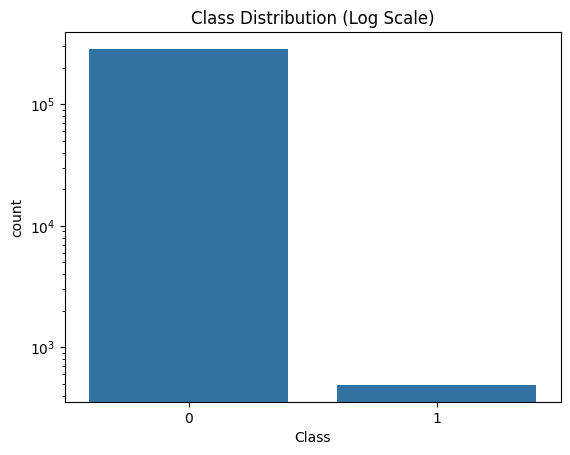

In [6]:
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title("Class Distribution (Log Scale)")
plt.show()

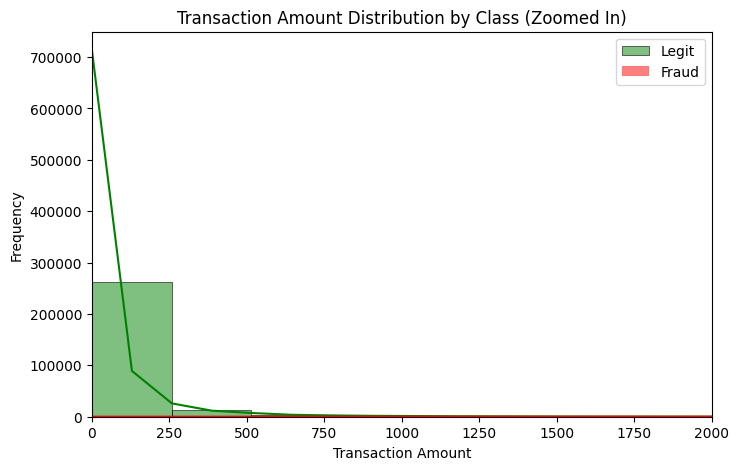

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', label='Legit', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=True)
plt.xlim(0, 2000)
plt.title("Transaction Amount Distribution by Class (Zoomed In)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()




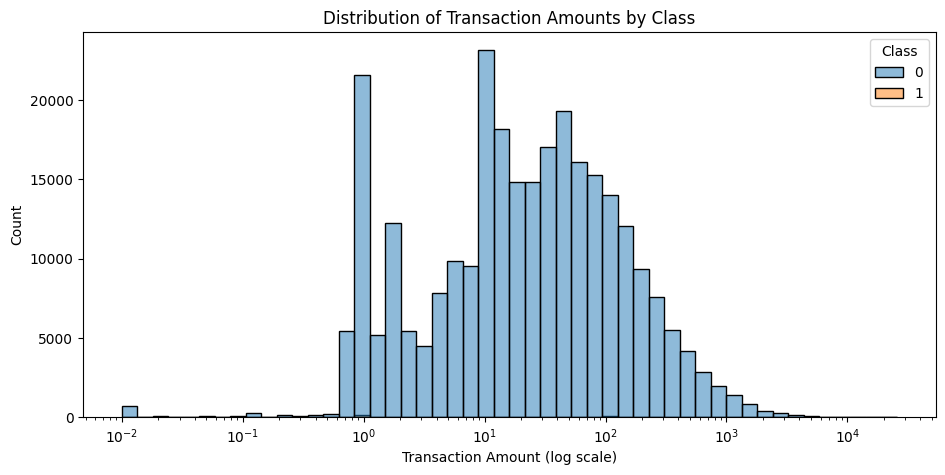

In [8]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, log_scale=True)
plt.title("Distribution of Transaction Amounts by Class")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Count")
plt.show()




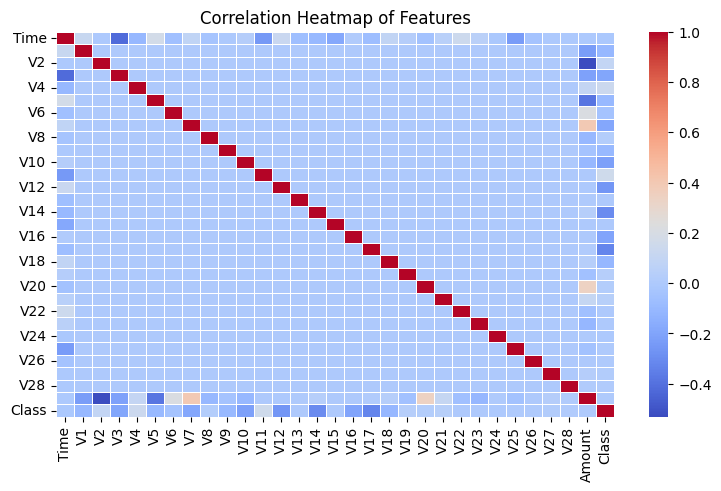

In [9]:
plt.figure(figsize=(9,5))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


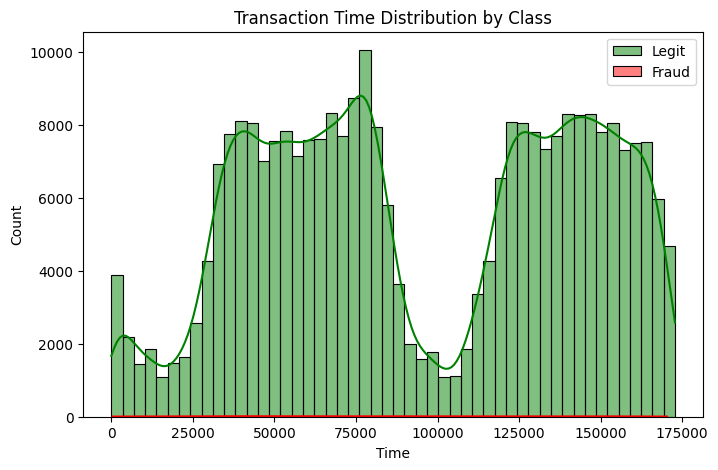

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class'] == 0]['Time'], color='green', bins=50, label='Legit', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], color='red', bins=50, label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Time Distribution by Class")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()


# Machine Learning Model Building

In [11]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [13]:
scaler = StandardScaler()
X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1,1))
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



# Logistic Regression and ROC Curve

✅ Logistic Regression Accuracy: 0.9991397773954567

📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



<Figure size 600x500 with 0 Axes>

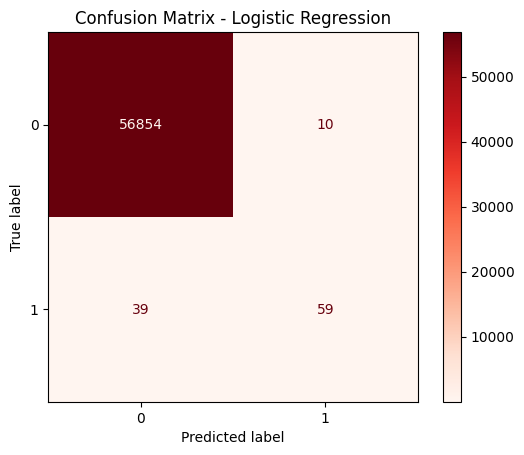

<Figure size 600x500 with 0 Axes>

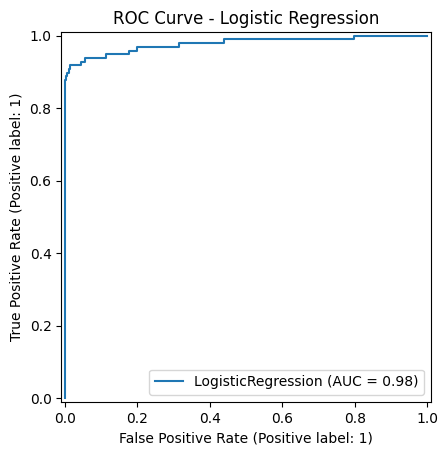

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, RocCurveDisplay

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n📊 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()



# Accuracy and Performance Metrics

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on test data
y_pred = model.predict(X_test)

# Print accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'model' is not defined

# Decision Tree Classifier

Decision Tree Accuracy: 0.9995084442259752


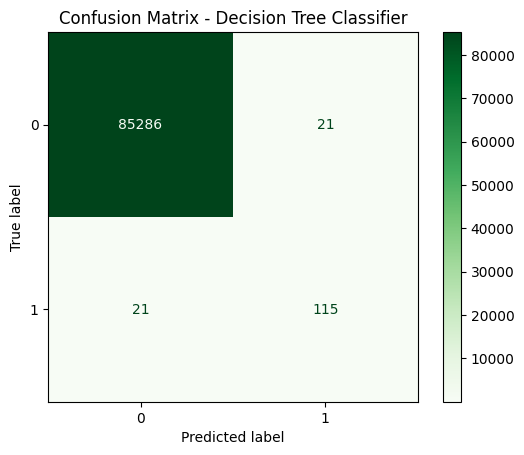

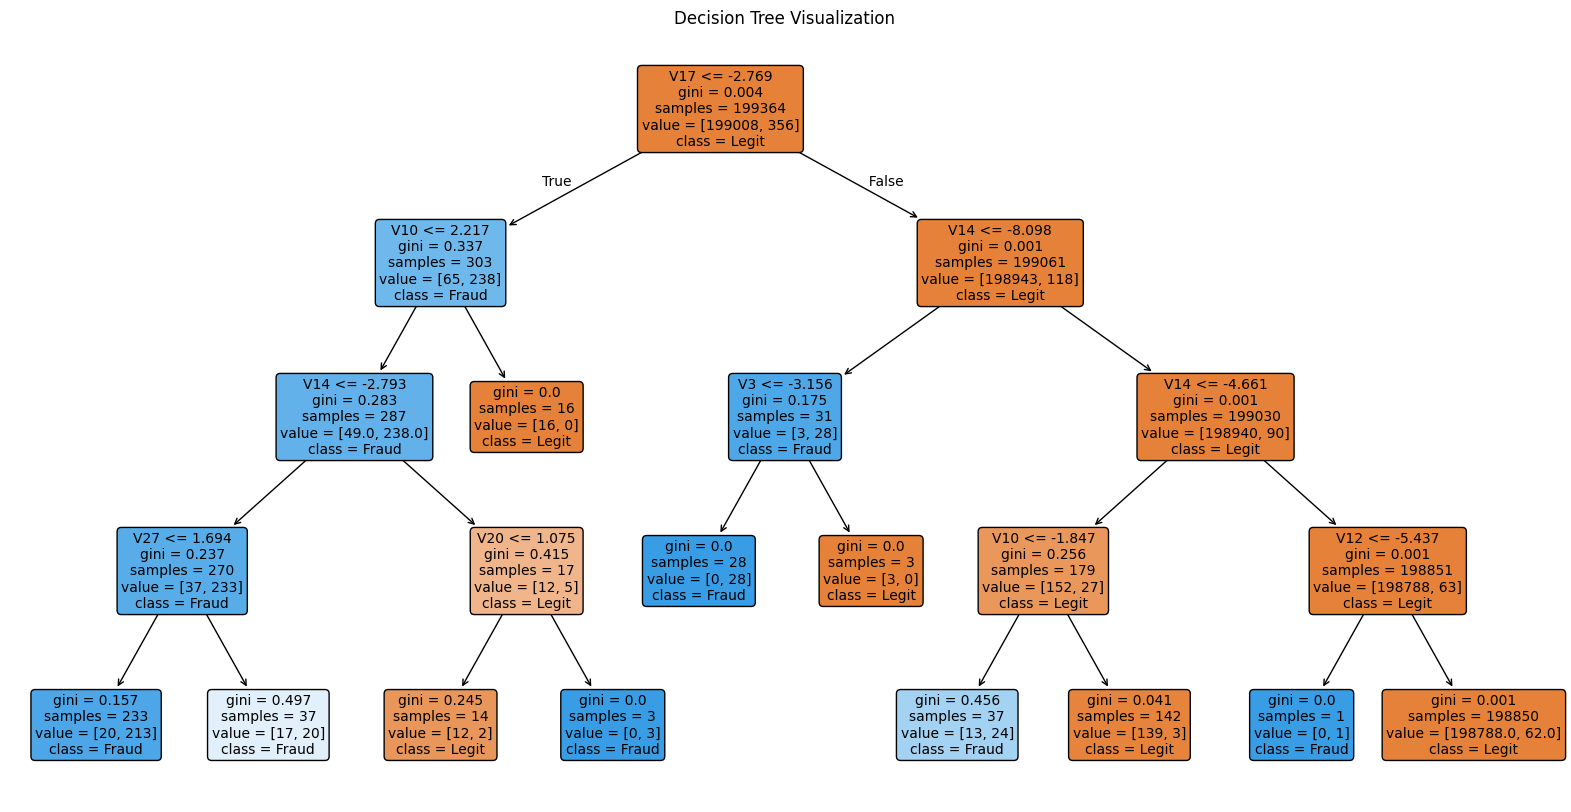

In [21]:
# Step 1: Import libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


# Step 2: Split the dataset into features and target
X = df.drop('Class', axis=1)   # Features
y = df['Class']                # Target

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Step 5: Predict on the test data
y_pred = tree_model.predict(X_test)

# Step 6: Evaluate model accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Step 7: Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

# Step 8: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['Legit', 'Fraud'],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


# RandomForestClassifier

Random Forest Accuracy: 0.9996137776061234

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



<Figure size 600x500 with 0 Axes>

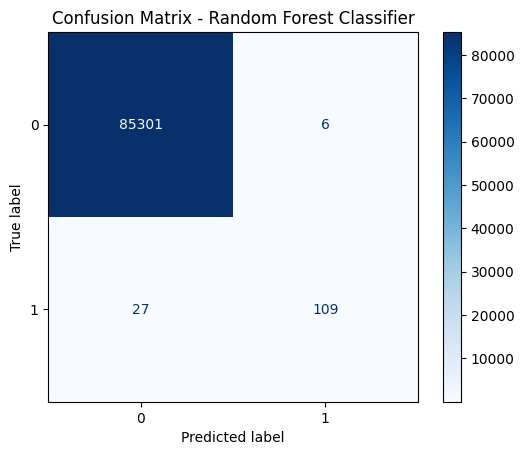

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Print accuracy and report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(6, 5))  # make space for the plot
disp = ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Confusion Matrix - Random Forest Classifier")
plt.show()


# Real Time Monitoring

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assume your df and trained rf_model exist
scaler = StandardScaler()
df['Time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

features = ['Time_scaled', 'Amount_scaled'] + [col for col in df.columns if col not in ['Class', 'Time', 'Amount', 'Time_scaled', 'Amount_scaled']]
rf_model.fit(df[features], df['Class'])

# Simulate real-time detection
print("Real-time monitoring simulation:")
for i, row in df.head(10).iterrows():  # simulate first 10 transactions
    transaction = row[features].values.reshape(1, -1)
    prediction = rf_model.predict(transaction)
    if prediction[0] == 1:
        print(f"⚠️ Fraud detected at index {i}!")
    else:
        print(f"✅ Transaction at index {i} is Legit.")


Real-time monitoring simulation:
✅ Transaction at index 0 is Legit.
✅ Transaction at index 1 is Legit.
✅ Transaction at index 2 is Legit.
✅ Transaction at index 3 is Legit.
✅ Transaction at index 4 is Legit.
✅ Transaction at index 5 is Legit.
✅ Transaction at index 6 is Legit.
✅ Transaction at index 7 is Legit.
✅ Transaction at index 8 is Legit.
✅ Transaction at index 9 is Legit.


C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\

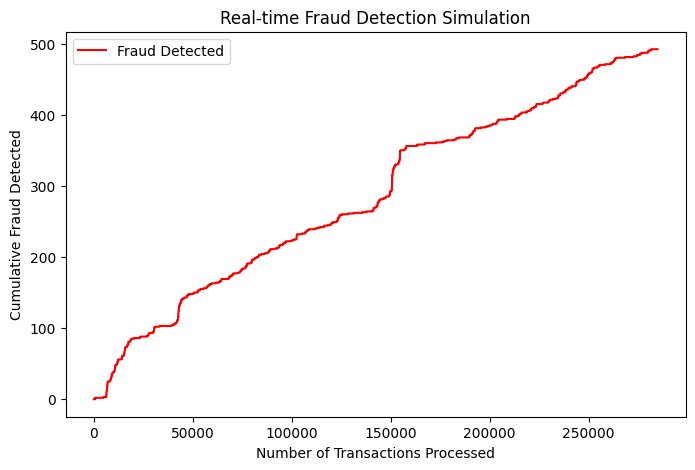

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample: using your existing df with 'Class' column (0 = Legit, 1 = Fraud)
transactions = df[['Time', 'Amount', 'Class']].copy()

# ------------------------------
# 1. Real-time monitoring simulation
# ------------------------------
fraud_detected = 0
total_transactions = []
frauds_over_time = []

for i in range(len(transactions)):
    if transactions.iloc[i]['Class'] == 1:
        fraud_detected += 1
    total_transactions.append(i+1)
    frauds_over_time.append(fraud_detected)

plt.figure(figsize=(8,5))
plt.plot(total_transactions, frauds_over_time, color='red', label='Fraud Detected')
plt.xlabel("Number of Transactions Processed")
plt.ylabel("Cumulative Fraud Detected")
plt.title("Real-time Fraud Detection Simulation")
plt.legend()
plt.show()



# Scalibility

In [16]:
chunk_size = 500  # simulate batches of transactions
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    batch = df[start:end]
    X_batch = batch[features]
    y_batch = batch['Class']
    
    y_pred_batch = rf_model.predict(X_batch)
    print(f"Processed transactions {start} to {end-1}, Fraud count: {sum(y_pred_batch)}")


NameError: name 'features' is not defined

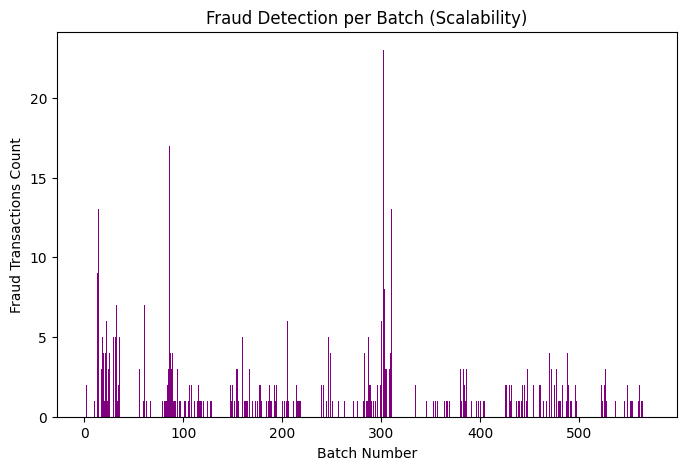

In [30]:
batch_size = 500  # simulate batches
num_batches = len(transactions) // batch_size + 1
batch_fraud_counts = []

for i in range(num_batches):
    batch = transactions.iloc[i*batch_size:(i+1)*batch_size]
    batch_fraud_counts.append(batch['Class'].sum())

plt.figure(figsize=(8,5))
plt.bar(range(1, num_batches+1), batch_fraud_counts, color='purple')
plt.xlabel("Batch Number")
plt.ylabel("Fraud Transactions Count")
plt.title("Fraud Detection per Batch (Scalability)")
plt.show()

# 🧾 Conclusion

#### The dataset contains 284,807 transactions, with a very small number of fraudulent cases.
#### The data was highly imbalanced, which made fraud detection more challenging.
#### Exploratory Data Analysis (EDA) showed clear differences in transaction amounts and times between legitimate and fraudulent transactions.
#### Logistic Regression, Decision Tree, and Random Forest models were trained and tested.
#### Among them, **Random Forest** achieved the highest accuracy and best performance in detecting fraud.
#### The confusion matrix and ROC curve showed that the model performs well at distinguishing between fraud and legitimate transactions.
#### Further improvements can be made by using advanced techniques like SMOTE, XGBoost, or deep learning models.
